# TD 3 | Étude de la marge EGT d'un turboréacteur

---

Objectifs du TD :

* pratiquer sur un premier use case concret d'analyse de données de moteurs d'avion
* fonctions glissantes pandas (_rolling_)
* régression linéaire

---

La table fournie contient les données moteurs disposant de l'information "marge EGT" (egthdm) issue
des rapports ACARS. Il s'agit donc uniquement de rapports extraits au décollage (TAKEOFF). On a
récupéré l'ensemble des rapports des moteurs livrés depuis avril 2016.

## 1. Chargement et nettoyage des données

#### 1.1. Chargez les données ACARS à l'aide de la méthode pandas `read_excel`. Explorez les propriétés générales du jeu de données.

Fichier de données : `./data/accars_b.xlsx`.

In [1]:
!git clone https://github.com/MadaneA/MACS3-Statistiques-Descriptives-TDs.git

fatal: destination path 'MACS3-Statistiques-Descriptives-TDs' already exists and is not an empty directory.


In [2]:
import os
os.chdir('MACS3-Statistiques-Descriptives-TDs')

In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel('./data/accars_b.xlsx')

In [4]:
dim=df.shape
print(df.size)
print('Nombre de variables :\n', dim[1])
print("Nombre d'observatons :\n", dim[0])
print('Nom et type des variables:')
df.dtypes


2331050
Nombre de variables :
 50
Nombre d'observatons :
 46621
Nom et type des variables:


flight_phase                    object
engine_number                    int64
engine_type                      int64
aircraft_number                  int64
engine_position                  int64
airline_classif_environment     object
brat                           float64
cas                            float64
cycles                         float64
delfn                          float64
deln1                          float64
dtamb                          float64
egthdm                         float64
iai                            float64
iaie1                          float64
iaie2                          float64
iaiwg                          float64
ibe1                             int64
ibe2                             int64
ivs12                            int64
pcn1k                          float64
sloatl                         float64
tsih                           float64
vbvpos                         float64
wbe                            float64
yn1mod                   

#### 1.2. Y a-t-il des valeurs manquantes ? Si oui, décrivez leur répartition et affichez le nombre de valeurs manquantes par colonne sous forme d'un bar plot.

il y a 475585 valeurs manquantes


C:\Users\djame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Text(0.5, 1.0, 'nombre de valeurs manquantes par variables')

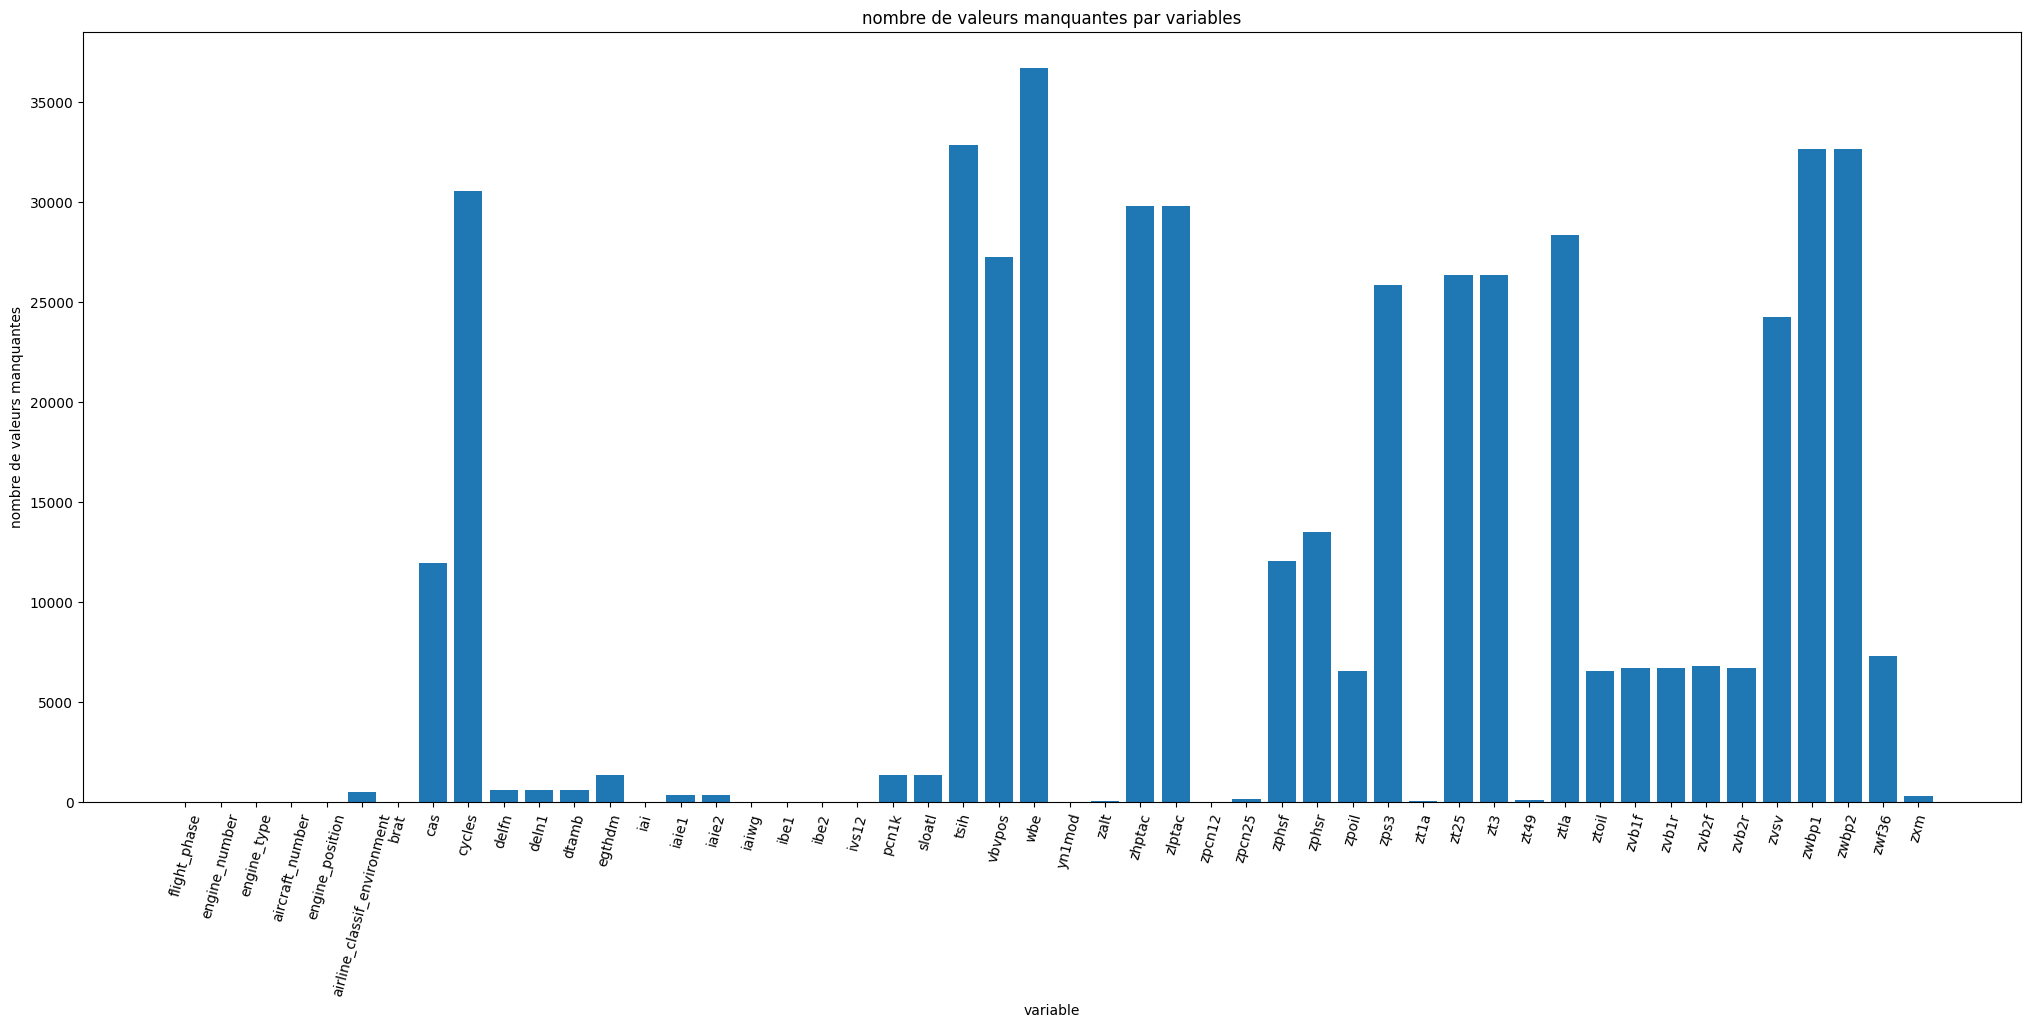

In [5]:
import matplotlib.pyplot as plt
valeurs_manquantes=df.isna()
print(f"il y a {np.sum(np.mat(valeurs_manquantes))} valeurs manquantes")
sum=np.sum(valeurs_manquantes)
plt.figure(figsize=(25,10)); # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(sum.size), sum);
plt.xticks(np.arange(sum.size),sum.index.tolist(), rotation=75);
plt.xlabel("variable")
plt.ylabel("nombre de valeurs manquantes")
plt.title("nombre de valeurs manquantes par variables")

#### 1.3. Ne gardez que les lignes où le nombre de cycles (variable `cycles`) et la marge EGT (variable `egthdm`) sont présentes.

In [6]:
data=df.dropna(subset=['cycles', 'egthdm'])
data.shape

(15374, 50)

#### 1.4. Affichez les différents types de moteurs (indice : utilisez la méthode `unique()`).

In [7]:
data['engine_type'].unique()

array([10,  5,  7], dtype=int64)

#### 1.5. Sélectionnez uniquement les moteurs de type 10. Combien y a-t-il d'avions distincts ? Combien de vols par avion ? (attention : il y a 2 moteurs sur un avion)

il y a 5 avions différents


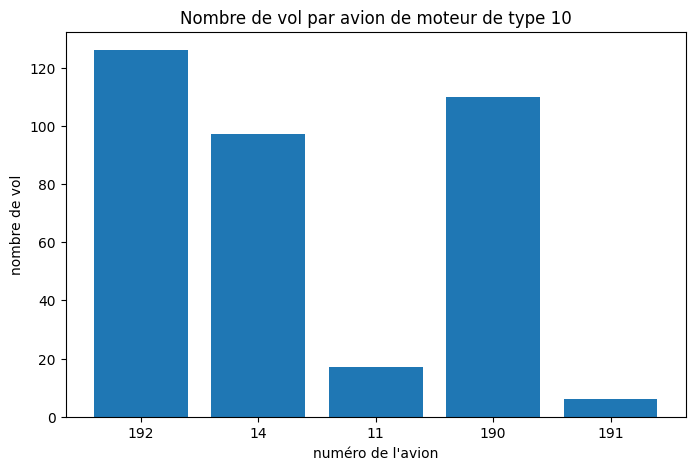

In [8]:
moteur_10=data[data['engine_type']==10]
print(f"il y a {moteur_10['aircraft_number'].nunique()} avions différents")
avions=moteur_10['aircraft_number'].unique()
vol_avion=[]
for avion in avions:
    x=len(moteur_10[moteur_10['aircraft_number']==avion])
    vol_avion.append(x/2)
plt.figure(figsize=(8,5)); # la méthode figure permet de créer une nouvelle figure et de configurer ses paramètres
plt.bar(np.arange(len(vol_avion)), vol_avion, tick_label=avions);
plt.title("Nombre de vol par avion de moteur de type 10")
plt.xlabel("numéro de l'avion")
plt.ylabel("nombre de vol");


## 2. Étude de la marge EGT de l'avion 190

#### 2.1. Récupérez les variables `engine_number`, nombre de cycles (`cycles`) et marge EGT (`egthdm`) pour l'avion identifié par le numéro 190.

In [9]:
avion_190=data[data['aircraft_number']==190]
avion_190=avion_190[['engine_number', 'cycles', 'egthdm']]
avion_190.head()

,engine_number,cycles,egthdm
11398,179,98.0,52.0118
11399,180,69.0,57.6415
11400,180,75.0,48.7217
11755,179,0.0,37.6572
11756,179,1.0,37.2208


#### 2.2. Affichez la courbe de l'évolution de la marge EGT au cours du temps pour les deux moteurs de l'avion, sur deux graphes séparés et en prenant soin d'ajouter des légendes.

Text(0.5, 1.0, 'Evolution de la marge EGT du moteur 180 au cours du temps')

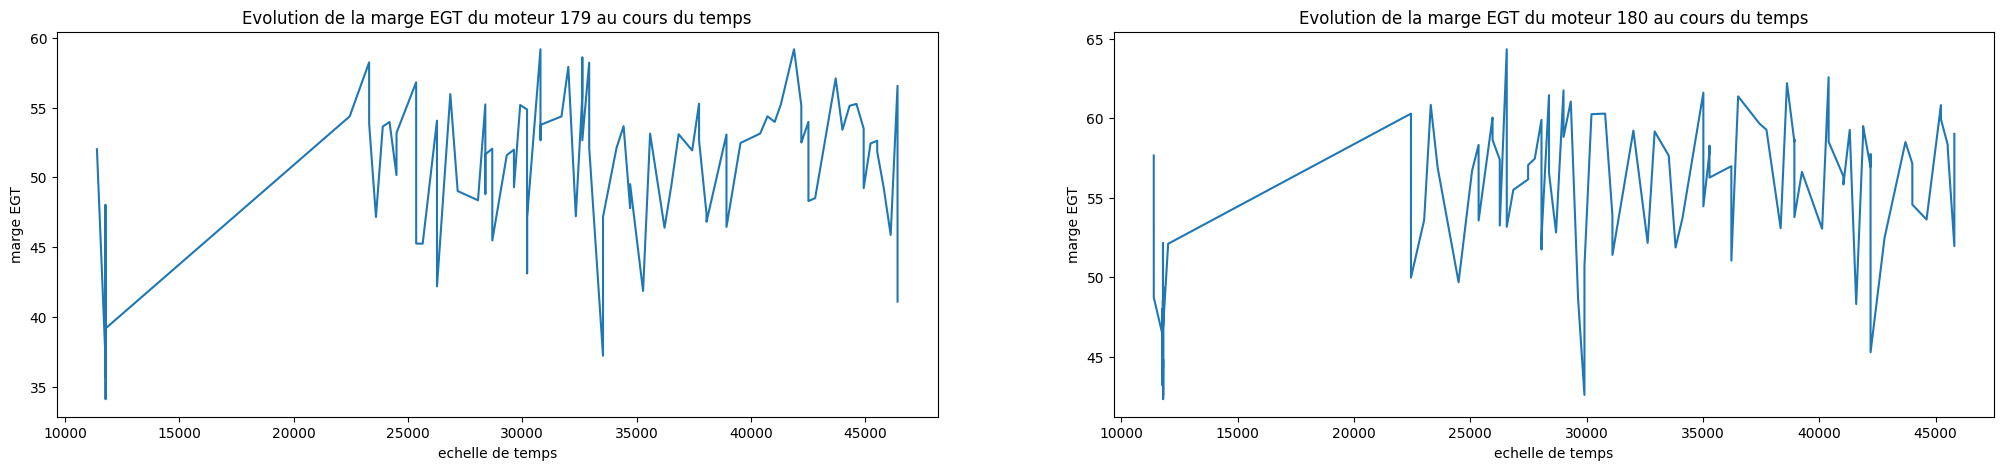

In [10]:
moteur_179=avion_190[avion_190['engine_number']==179]
moteur_180=avion_190[avion_190['engine_number']==180]
fig = plt.figure(figsize=(25,5));
plt.subplot(1,2,1)
plt.plot(moteur_179['egthdm']);
plt.xlabel("echelle de temps")
plt.ylabel("marge EGT")
plt.title("Evolution de la marge EGT du moteur 179 au cours du temps")
plt.subplot(1,2,2)
plt.plot(moteur_180['egthdm']);
plt.xlabel("echelle de temps")
plt.ylabel("marge EGT")
plt.title("Evolution de la marge EGT du moteur 180 au cours du temps")


#### 2.3. Pour la suite, on ne s'intéresse qu'au moteur 179. Quel est le nombre de vols manquant dans les données ?

In [41]:
manque=max(moteur_179['cycles']+1)-len(moteur_179['cycles'].unique())
print(f"il manque {int(manque)} vols dans les données")

il manque 73 vols dans les données


#### 2.4. Nettoyage de la marge EGT

On constate que sur un même cycle, il peut y avoir 2 valeurs de la variable `egthdm` mesurées. On ne souhaite garder que la plus grande des deux, et avoir une seule ligne par cycle, afin que l'on puisse utiliser le nombre de cycles comme index. Enfin, on veut compléter l'index pour les vols manquants, en remplissant les lignes par `NaN`. Pour cela, effectuez l'exercice suivant:

1. Utilisez une aggrégation pour obtenir la plus grande valeur à chaque cycle et stockez le résultat dans une Series pandas appelée 'egt'.
2. Ré-indexez le DataFrame pour avoir une ligne pour tout nombre de cycles (indice : passez par la méthode reindex).

In [112]:
cycles=moteur_179['cycles'].unique()
egt=[]
for i in range(int(max(moteur_179['cycles'])+1)):
    if i in cycles:
        cycles_i=moteur_179[moteur_179['cycles']==i]
        egt.append(max(cycles_i['egthdm']))
    else:
        egt.append(np.NaN)
moteur_179_net=moteur_179.reindex(range(int(max(moteur_179['cycles'])+1)))
moteur_179_net['cycles']=range(int(max(moteur_179['cycles'])+1))
moteur_179_net["egthdm"]=egt
moteur_179_net['engine_number']=179




#### 2.5. On souhaite lisser les valeurs et se débarasser des outliers à l'aide d'une médiane glissante sur 15 cycles. Affichez sur un même graphe la marge EGT brute (points) et la marge lissée (ligne).
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html#pandas.Series.rolling

Utilisez une fenêtre glissante de taille 15 cycles, avec un minimum de 3 observations non-nulles par fenêtre (paramètre `min_periods`).

In [113]:
moteur_179_net['egthdm']=moteur_179_net['egthdm'].rolling(15, min_periods=3).median()
moteur_179_net

,engine_number,cycles,egthdm
0,179,0,NaN
1,179,1,NaN
2,179,2,56.81040
3,179,3,56.01835
4,179,4,55.22630
...,...,...,...
159,179,159,NaN
160,179,160,NaN
161,179,161,NaN
162,179,162,NaN


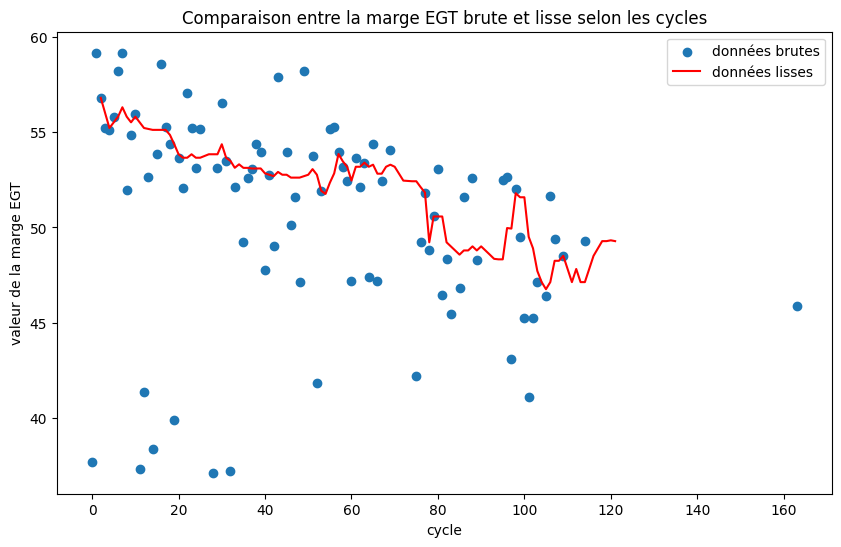

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(moteur_179_net['cycles'], egt, label="données brutes", marker="o")
plt.plot(moteur_179_net['cycles'], moteur_179_net['egthdm'], label="données lisses", color='red')
plt.xlabel("cycle")
plt.ylabel("valeur de la marge EGT")
plt.legend()
plt.title("Comparaison entre la marge EGT brute et lisse selon les cycles");

#### 2.6. Nettoyage de la marge EGT lissée

La marge EGT ne peut être que décroissante, sauf en cas de nettoyage moteur (waterwash) ou peut-être à cause d'éléments extérieurs, on va donc éviter de tenir compte des remontées de marge et ne prendre en considération que les points descendants. Cette estimation est pessimiste mais évite de prendre en compte ces facteurs extérieurs.

1. Calculez une série ne contenant que les valeurs décroissantes de la amrge EGT lissée.
2. Sur le graphique précédent, ajoutez ces points par-dessus la courbe.

In [128]:
egt_lisse=moteur_179_net['egthdm']
ind=np.where(~np.isnan(egt_lisse))[0][0]

cycle_lisse=[ind]
egt_decr = [egt_lisse[ind]]  # Initialisation avec le premier élément
for i in range(ind+1, len(egt_lisse)):
    if egt_lisse[i] < egt_decr[len(egt_decr)-1]:
        cycle_lisse.append(i)
        egt_decr.append(egt_lisse[i])

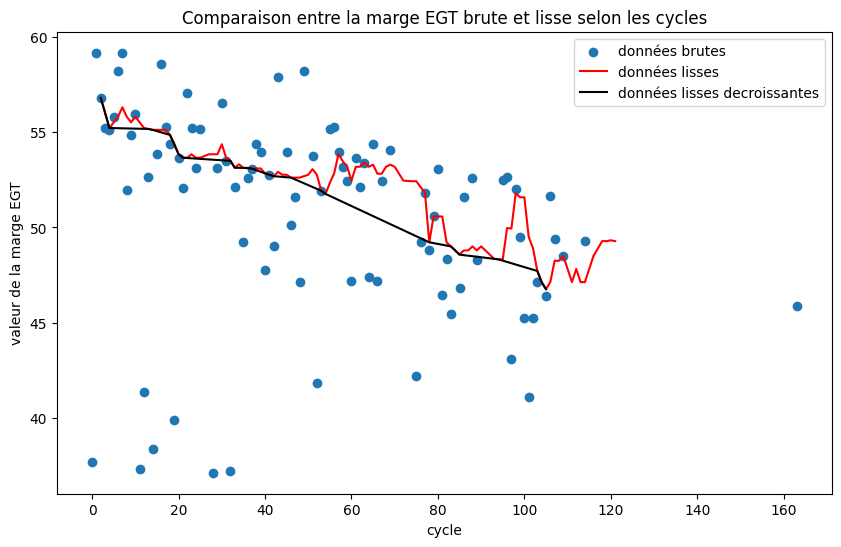

In [129]:
plt.figure(figsize=(10,6))
plt.scatter(moteur_179_net['cycles'], egt, label="données brutes", marker="o")
plt.plot(moteur_179_net['cycles'], moteur_179_net['egthdm'], label="données lisses", color='red')
plt.plot(cycle_lisse, egt_decr, label="données lisses decroissantes", color='black')
plt.xlabel("cycle")
plt.ylabel("valeur de la marge EGT")
plt.legend()
plt.title("Comparaison entre la marge EGT brute et lisse selon les cycles");


#### 2.7. Estimation de la pente de la marge EGT

La pente de la marge EGT est un indicateur très intéressant de l'usure du moteur. On l'estime par régression linéaire par rapport au nombre de cycles. Pour cela, on utilise les points conservés précédemment qui constituent une estimation pessimiste.

Pour la régression linéaire, on utilisera le modèle `LinearRegression` de scikit-learn. Son utilisation est similaire aux autres modèles de scikit-learn :
```python
lr = LinearRegression()
model = lr.fit(X, y)
```

1. Apprenez un modèle `LinearRegression` sur les données calculées précédemment. Affichez les coefficients et l'ordonnée à l'origine (_intercept_) du modèle obtenu. Les valeurs sont-elles cohérentes ? (indices : pour passer d'un objet pandas (DataFrame ou Series) à un array numpy, utilisez la propriété `values`)
2. Tracez la droite obtenue sur le graphe précédent.

In [84]:
from sklearn.linear_model import LinearRegression

In [96]:
lr= LinearRegression()
lr.fit(np.array(cycle_lisse).reshape(-1,1),egt_decr)
predict=lr.predict(np.array(cycle_lisse).reshape(-1,1))
print(f"la pente de la regression linéaire est {lr.coef_[0]} et l'ordonnée à l'origine est {lr.intercept_}")

la pente de la regression linéaire est -0.0860951404041799 et l'ordonnée à l'origine est 56.185555728145275


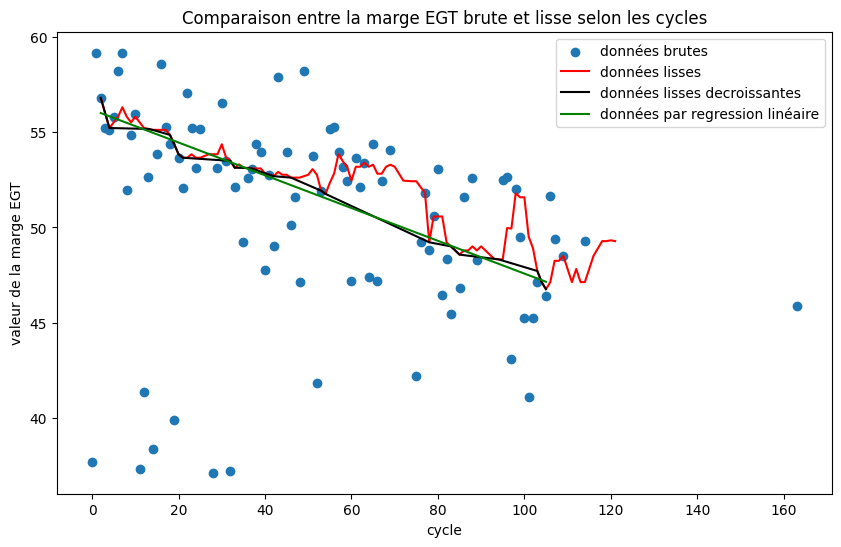

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(moteur_179_net['cycles'], egt, label="données brutes", marker="o")
plt.plot(moteur_179_net['cycles'], moteur_179_net['egthdm'], label="données lisses", color='red')
plt.plot(cycle_lisse, egt_decr, label="données lisses decroissantes", color='black')
plt.plot(cycle_lisse,predict , label="données par regression linéaire", color='green')
plt.xlabel("cycle")
plt.ylabel("valeur de la marge EGT")
plt.legend()
plt.title("Comparaison entre la marge EGT brute et lisse selon les cycles");


### 3. Écriture d'une fonction de calcul de la pente EGT pour tous les moteurs

Tout d'abord, bravo si vous êtes arrivés jusque là ! Toutes les opérations que l'on a effectuées ont permis d'estimer la pente de la marge EGT du moteur 179 de l'avion 190 de type 10, et donc son usure. Maintenant, on souhaite répéter ce processus sur tous les moteurs ! Pour cela, il faudra créer une fonction Python générique, prenant en entrée l'ensemble du jeu de données ACARS et produisant en sortie l'ensemble des pentes/intercept des modèles de régression linéaire appris pour chaque moteur.

L'un des intérêts est de pouvoir prédire l'usure des moteurs, après un nombre de cycles donné.

Voici le squelette de la fonction à écrire (en ré-utilisant et adaptant tout les morceaux de code précédents) :

```python
def regress_egt_margin(df_acars):
    ...
    return df_regress_models # Contient les pentes et intercept pour tous les moteurs
```

In [335]:
def regress_egt_margin(df_acars):
    moteurs=df_acars['engine_number'].unique()
    regress_models=[]
    engine_type=[]
    for moteur in moteurs:
        #Réduction des données pour garder le minimum necessaire
        donnees=df_acars[df_acars['engine_number']==moteur]
        engine_type.append([moteur,int(donnees['engine_type'].unique())]);
        donnees=donnees[['engine_number', 'cycles', 'egthdm']]
        #récupération du max des marge EGT pour chaque cycle
        cycles=donnees['cycles'].unique()
        egt=[]
        for i in range(int(max(donnees['cycles'])+1)):
            if i in cycles:
                cycles_i=donnees[donnees['cycles']==i]
                egt.append(max(cycles_i['egthdm']))
            else:
                egt.append(np.NaN)
        # Nouvelle indexation selon les cycles
        data_net=donnees.reindex(range(int(max(donnees['cycles'])+1)))
        data_net['cycles']=range(int(max(donnees['cycles'])+1))
        data_net["egthdm"]=egt
        data_net['engine_number']=moteur
        # Moyenne glissante pour lisser
        data_net['egthdm']=data_net['egthdm'].rolling(15, min_periods=3).median()
        #Nettoyage de la marge EGT lissée 
        egt_lisse=data_net['egthdm']
        if np.all(np.isnan(egt_lisse)):
            ind=0
            reg=[moteur, np.nan, np.nan]
        else:
            ind=np.where(~np.isnan(egt_lisse))[0][0]
        #print(f'{moteur} \n {egt_lisse}')
            cycle_lisse=[ind]
            egt_decr = [egt_lisse[ind]]  # Initialisation avec le premier élément
            for i in range(ind+1, len(egt_lisse)):
                if egt_lisse[i] < egt_decr[len(egt_decr)-1]:
                    cycle_lisse.append(i)
                    egt_decr.append(egt_lisse[i])
            # Regression linéaire 
            lr= LinearRegression()
            lr.fit(np.array(cycle_lisse).reshape(-1,1),egt_decr)
            lr.predict(np.array(cycle_lisse).reshape(-1,1))
            reg=[moteur, lr.coef_[0], lr.intercept_]
        regress_models.append(reg)
    colonnes=['engine_number', 'pente', 'intercept']
    df_regress_models=pd.DataFrame(regress_models, columns=colonnes)
    return [df_regress_models, np.array(engine_type)] # Contient les pentes et intercept pour tous les moteurs

In [341]:
[df_regress_models, types]=regress_egt_margin(data);
df_regress_models.set_index('engine_number', inplace= True)
sort=np.sort(data['engine_number'].unique())
df_types=pd.DataFrame(types)
df_types[1]=pd.to_numeric(df_types[1])
df_types.set_index(0, inplace= True)
df_types=df_types.reindex(sort)
df_reindex=df_regress_models.reindex(sort)
df_reindex['engine_type']=df_types[1]
print(df_reindex.dtypes)

C:\Users\djame\AppData\Local\Temp\ipykernel_7824\1868765661.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  engine_type.append([moteur,int(donnees['engine_type'].unique())]);
C:\Users\djame\AppData\Local\Temp\ipykernel_7824\1868765661.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  engine_type.append([moteur,int(donnees['engine_type'].unique())]);
C:\Users\djame\AppData\Local\Temp\ipykernel_7824\1868765661.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
 

pente          float64
intercept      float64
engine_type      int64
dtype: object


C:\Users\djame\AppData\Local\Temp\ipykernel_7824\1868765661.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  engine_type.append([moteur,int(donnees['engine_type'].unique())]);
C:\Users\djame\AppData\Local\Temp\ipykernel_7824\1868765661.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  engine_type.append([moteur,int(donnees['engine_type'].unique())]);
C:\Users\djame\AppData\Local\Temp\ipykernel_7824\1868765661.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
 

### 4. Comparaison de l'usure des 3 types de moteurs

#### 4.1. Prédiction de la marge EGT au 150ème par type de moteur

1. Pour chaque moteur, utilisez son modèle de régression pour prédire la valeur de la marge EGT après 150 cycles d'utilisation (indice : méthode `apply`).
2. Représentez ces valeurs par type moteur sur un box plot. Décrivez le résultat obtenu.
3. Calculez la moyenne de la marge au 150ème cycle par type de moteur. Quel type de moteur a la plus grande marge moyenne après 150 cycles ?

C:\Users\djame\AppData\Local\Temp\ipykernel_7824\2025350429.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marge=row[0]*x+row[1];


Text(0.5, 1.0, 'Box plot de la prediction pour 150 cycles en fonction du type de moteur')

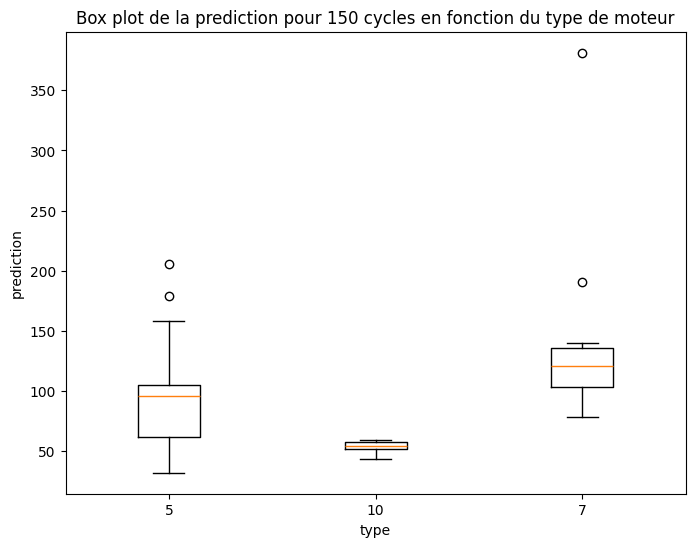

In [364]:
def prediction(row, x):
    marge=row[0]*x+row[1];
    return marge;
prediction_150=df_reindex.apply(lambda row:prediction(row, 15), axis=1);
df_150=pd.DataFrame({'prediction': prediction_150.tolist(), 'type':df_reindex['engine_type']})
df_150=df_150.dropna()
valeurs_par_type = [df_150[df_150['type'] == t]['prediction'].tolist() for t in df_150['type'].unique()]
plt.figure(figsize=(8, 6))
plt.boxplot(valeurs_par_type,  labels=df_150['type'].unique())
plt.xlabel('type')
plt.ylabel('prediction')
plt.title('Box plot de la prediction pour 150 cycles en fonction du type de moteur')

In [376]:
"""
Le moteur 10 a des valeurs assez petites et très homogènes, ce qui explique 
les caractérisques du moteur font qu'il est globalement dégradé et qu'il faudra 
le réparer ou le changer peu après les 150 cycles. Le moteur 7 est celui qui tient 
le mieux après 150 cycles et le moteur 5 est le plus hétérogène. 
"""
mean=df_150.groupby('type')['prediction'].mean()
print(f"la plus grande moyenne de marge EGT après 150 cycles est {mean.max()} pour le moteur {mean.index[mean.argmax()]}")

la plus grande moyenne de marge EGT après 150 cycles est 133.52680806703674 pour le moteur 7


#### 4.3. Vitesse de décroissance de la marge EGT par type de moteur

La pente de la marge EGT correspond à sa vitesse de décroissance par cycle.

1. Quelle est son unité ?
2. Représentez ces valeurs par type de moteur sur un boxplot. Décrivez le résultat obtenu.
3. Calculez moyenne de la pente par type de moteur. Quel type de moteur a la plus faible vitesse de décroissance et donc la plus faible vitesse d'usure ?

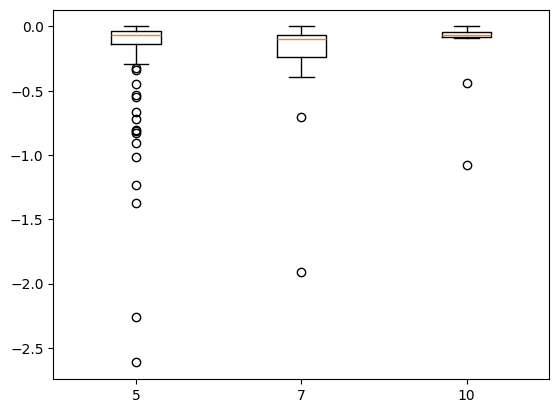

In [381]:
"""
L'unité de la pente de la marge EGT est degrés/cycle.
"""
df_reindex_clean=df_reindex.dropna()
groupes=df_reindex_clean.groupby('engine_type')['pente'].apply(list)
plt.boxplot(groupes, labels=groupes.index);


In [386]:
"""
On remarque le moteur 10 à les plus faibles valeurs de dégradation et la plus faible variation de valeurs. Alors on peut en conclure 
que le moteur est est dès le départ peu efficace. Les deux autres types sont plsu robustes car malgré des pentes plus élevées, ils tiennent
 le choc sur la durée. Le moteur 5 a des pentes très diverses et un nombre important de valeurs extrêmes. 
"""
mean=df_reindex_clean.groupby('engine_type')['pente'].mean()
print(mean)
print(f"la plus faible décroissante de marge EGT est {mean.max()} pour le moteur {mean.index[mean.argmax()]}")


engine_type
5    -0.167905
7    -0.256815
10   -0.194947
Name: pente, dtype: float64
la plus faible décroissante de marge EGT est -0.16790548192484628 pour le moteur 5
